In [56]:
import os

In [51]:
import zipfile

In [49]:
import wget

In [ ]:
url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'
wget.download(url)

In [5]:
zip_ref = zipfile.ZipFile("pizza_steak.zip")

In [9]:
zip_ref.extractall()

In [2]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in pizza_steak.
There are 2 directories and 0 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/steak.
There are 0 directories and 250 images in pizza_steak/test/pizza.
There are 2 directories and 0 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/steak.
There are 0 directories and 750 images in pizza_steak/train/pizza.


In [3]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

In [6]:
num_steak_images_train

750

In [3]:
import tensorflow as tf

In [4]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [5]:
tf.random.set_seed(42)

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [63]:
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

In [64]:
train_data = train_datagen.flow_from_directory(train_dir, batch_size=32, target_size=(224, 224), class_mode="binary")

Found 1500 images belonging to 2 classes.


In [65]:
valid_data = valid_datagen.flow_from_directory(test_dir, batch_size=32, target_size=(224, 224), class_mode="binary")

Found 500 images belonging to 2 classes.


In [66]:
print("Доступні пристрої:", tf.config.list_physical_devices())

Доступні пристрої: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'), PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [67]:
print("GPU доступний:", tf.test.is_built_with_cuda())

GPU доступний: True


In [68]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model1.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [69]:
history = model1.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 169ms/step - accuracy: 0.5732 - loss: 0.6535 - val_accuracy: 0.7760 - val_loss: 0.4799
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.7988 - loss: 0.4419 - val_accuracy: 0.8080 - val_loss: 0.4000
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.8072 - loss: 0.3926 - val_accuracy: 0.8480 - val_loss: 0.3724
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.8392 - loss: 0.3804 - val_accuracy: 0.8580 - val_loss: 0.3251
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.8595 - loss: 0.3454 - val_accuracy: 0.8620 - val_loss: 0.3473


In [70]:
len(train_data)

47

In [71]:
len(train_data[0])

2

In [72]:
train_data[0][0].shape

(32, 224, 224, 3)

In [73]:
print("train data shape = (47, 2, 32, 224, 224, 3)")

train data shape = (47, 2, 32, 224, 224, 3)


In [74]:
train_data[0][1]

array([0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.],
      dtype=float32)

In [75]:
model1.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [76]:
images, labels = next(train_data)

In [77]:
len(images), len(labels)

(32, 32)

In [78]:
import pandas as pd

In [79]:
df = pd.DataFrame({
    "loss": history.history["loss"],
    "val_loss": history.history["val_loss"]
})

In [80]:
df

,loss,val_loss
0,0.587393,0.479883
1,0.431177,0.400017
2,0.409656,0.372355
3,0.373742,0.325098
4,0.336270,0.347330


<Axes: >

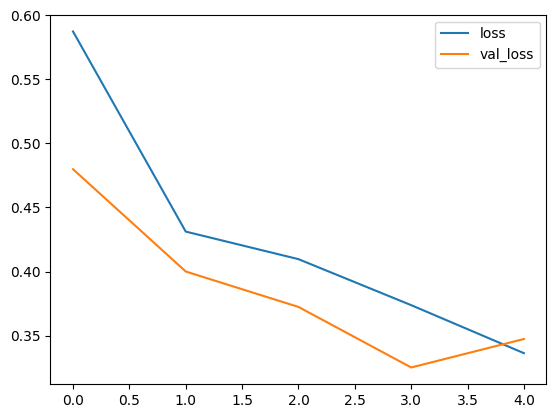

In [81]:
df.plot()

In [33]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model2.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [34]:
history = model2.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.5324 - loss: 0.6850 - val_accuracy: 0.8000 - val_loss: 0.4987
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.7832 - loss: 0.4912 - val_accuracy: 0.8380 - val_loss: 0.4077
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.7985 - loss: 0.4500 - val_accuracy: 0.8140 - val_loss: 0.4048
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.8112 - loss: 0.4262 - val_accuracy: 0.8640 - val_loss: 0.3619
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.8301 - loss: 0.4040 - val_accuracy: 0.8580 - val_loss: 0.3404


<Axes: >

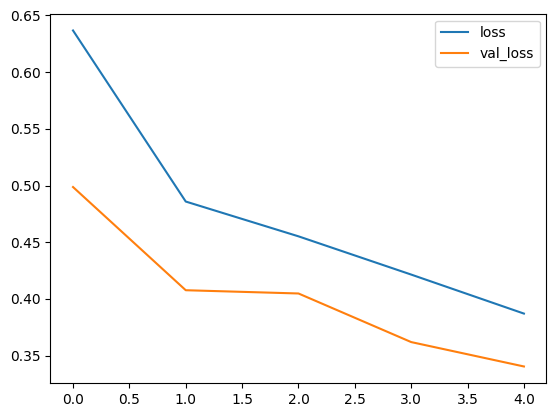

In [35]:
pd.DataFrame({"loss": history.history["loss"],
              "val_loss": history.history["val_loss"]
}).plot()

In [47]:
train_datagen_augmented = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=0.2, shear_range=0.2, zoom_range = 0.2, width_shift_range=0.2, height_shift_range=0.3)

In [48]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, batch_size=32, target_size=(224, 224), class_mode="binary")

Found 1500 images belonging to 2 classes.


Новий датасет не створюється.
Кожна епоха бачить різні версії тих самих зображень з оригінального датасету

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def plot_random_images(data, num_images=4):
    images, labels = next(data)
    indices = np.random.choice(range(len(images)), num_images, replace=False)
    
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[idx])
        plt.title(f"Class: {int(labels[idx])}")
        plt.axis('off')

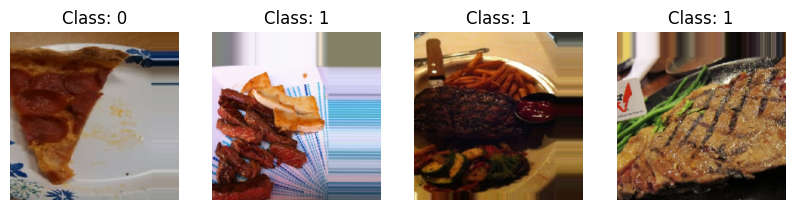

In [64]:
plot_random_images(train_data_augmented)

In [87]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model3.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [88]:
history = model3.fit(train_data_augmented, epochs=5, validation_data=valid_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 247ms/step - accuracy: 0.5650 - loss: 0.6830 - val_accuracy: 0.7480 - val_loss: 0.5351
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 244ms/step - accuracy: 0.7401 - loss: 0.5564 - val_accuracy: 0.7340 - val_loss: 0.5046
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 237ms/step - accuracy: 0.7550 - loss: 0.5055 - val_accuracy: 0.8480 - val_loss: 0.3727
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 241ms/step - accuracy: 0.7818 - loss: 0.4706 - val_accuracy: 0.8500 - val_loss: 0.3592
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 235ms/step - accuracy: 0.7959 - loss: 0.4666 - val_accuracy: 0.8580 - val_loss: 0.3388


<Axes: >

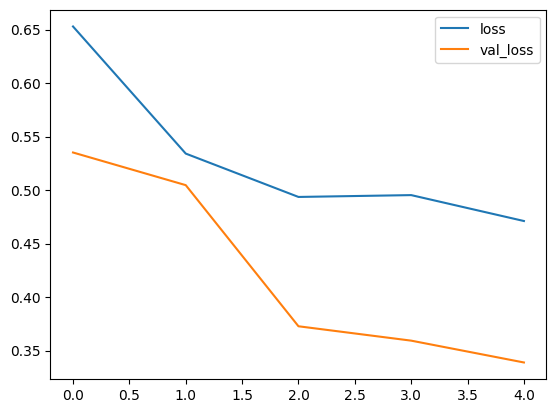

In [89]:
pd.DataFrame({"loss": history.history["loss"], "val_loss": history.history["val_loss"]}).plot()

In [92]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir, batch_size=32, target_size=(224, 224), class_mode="binary", shuffle=True)

Found 1500 images belonging to 2 classes.


In [95]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model4.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [96]:
history = model4.fit(train_data_augmented_shuffled, epochs=5, validation_data=valid_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 255ms/step - accuracy: 0.5306 - loss: 0.6914 - val_accuracy: 0.5420 - val_loss: 0.6625
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 257ms/step - accuracy: 0.6278 - loss: 0.6322 - val_accuracy: 0.7960 - val_loss: 0.4511
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 243ms/step - accuracy: 0.7510 - loss: 0.5341 - val_accuracy: 0.8540 - val_loss: 0.3868
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - accuracy: 0.7855 - loss: 0.4917 - val_accuracy: 0.8520 - val_loss: 0.3751
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 263ms/step - accuracy: 0.7692 - loss: 0.4934 - val_accuracy: 0.8740 - val_loss: 0.3525


<Axes: >

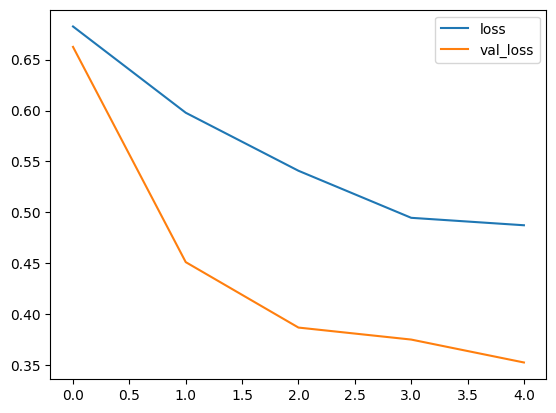

In [97]:
pd.DataFrame({"loss": history.history["loss"], "val_loss": history.history["val_loss"]}).plot()

In [15]:
train_data_shuffled = train_datagen.flow_from_directory(train_dir, batch_size=32, target_size=(224, 224), class_mode="binary", shuffle=True)

Found 1500 images belonging to 2 classes.


In [22]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(16, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model5.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [23]:
history = model5.fit(train_data_shuffled, epochs=5, validation_data=valid_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.5709 - loss: 0.7397 - val_accuracy: 0.8060 - val_loss: 0.4679
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.7923 - loss: 0.4675 - val_accuracy: 0.8300 - val_loss: 0.3767
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.7997 - loss: 0.4380 - val_accuracy: 0.8660 - val_loss: 0.3362
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8125 - loss: 0.4061 - val_accuracy: 0.8500 - val_loss: 0.3567
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.8398 - loss: 0.3682 - val_accuracy: 0.8840 - val_loss: 0.3075


<Axes: >

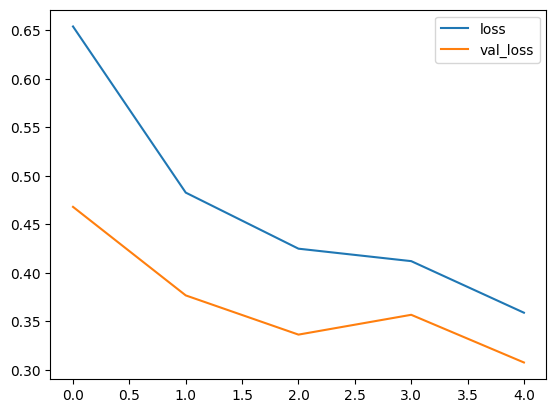

In [24]:
pd.DataFrame({"loss": history.history["loss"], "val_loss": history.history["val_loss"]}).plot()

In [27]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(16, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model6.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [28]:
history = model6.fit(train_data_shuffled, epochs=40, validation_data=valid_data, callbacks=[lr_scheduler])

Epoch 1/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.5684 - loss: 0.6757 - val_accuracy: 0.7600 - val_loss: 0.5766 - learning_rate: 1.0000e-04
Epoch 2/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.7417 - loss: 0.5652 - val_accuracy: 0.7280 - val_loss: 0.5384 - learning_rate: 1.1220e-04
Epoch 3/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.7622 - loss: 0.5109 - val_accuracy: 0.8160 - val_loss: 0.4397 - learning_rate: 1.2589e-04
Epoch 4/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7752 - loss: 0.4722 - val_accuracy: 0.8180 - val_loss: 0.4239 - learning_rate: 1.4125e-04
Epoch 5/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.8036 - loss: 0.4401 - val_accuracy: 0.8340 - val_loss: 0.3888 - learning_rate: 1.5849e-04
Epoch 6/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.8112 - loss: 0.4357 - val_accuracy: 0.8140 - val_loss: 0.4007 - learning_rate: 1.7783e-04
Epoch 7/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8374 

In [32]:
df = pd.DataFrame({"loss": history.history["loss"], "val_loss": history.history["val_loss"], "lr": history.history["learning_rate"]})

<Axes: >

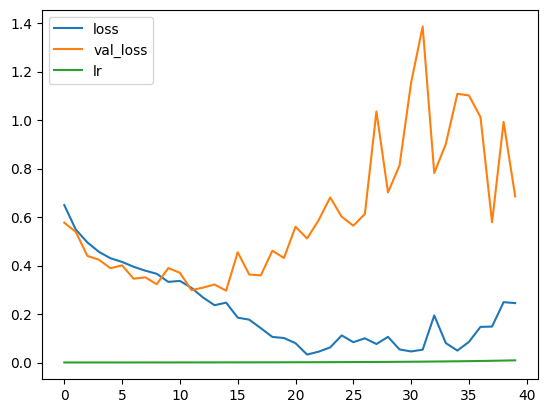

In [33]:
df.plot()

In [34]:
df[df["val_loss"] == df["val_loss"].min()]

,loss,val_loss,lr
14,0.247044,0.296282,0.000501


In [41]:
model7 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(16, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model7.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=["accuracy"])

In [42]:
history = model7.fit(train_data_shuffled, epochs=15, validation_data=valid_data)

Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.5712 - loss: 0.6927 - val_accuracy: 0.7880 - val_loss: 0.4469
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.7672 - loss: 0.4779 - val_accuracy: 0.8400 - val_loss: 0.3656
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.8293 - loss: 0.3897 - val_accuracy: 0.8320 - val_loss: 0.3835
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.8550 - loss: 0.3486 - val_accuracy: 0.8640 - val_loss: 0.3366
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8896 - loss: 0.2651 - val_accuracy: 0.8260 - val_loss: 0.3667
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9052 - loss: 0.2278 - val_accuracy: 0.8840 - val_loss: 0.2783
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9530 - loss: 0.1626 - val_accuracy: 0.8820 - val_loss: 0.2801
Epoch 8/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9729 - loss: 0.0971 - val_accuracy: 0.8800 - v

<Axes: >

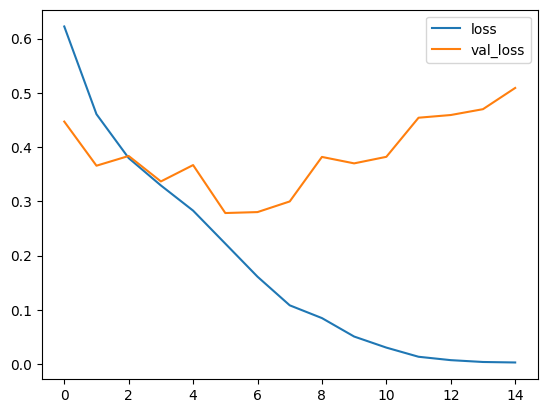

In [43]:
pd.DataFrame({"loss": history.history["loss"], "val_loss": history.history["val_loss"]}).plot()

In [46]:
model8 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(4, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(6, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(8, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model8.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [47]:
history = model8.fit(train_data_shuffled, epochs=15, validation_data=valid_data)

Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.5583 - loss: 0.6800 - val_accuracy: 0.7640 - val_loss: 0.5033
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.7439 - loss: 0.5256 - val_accuracy: 0.8100 - val_loss: 0.4404
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.7881 - loss: 0.4519 - val_accuracy: 0.8380 - val_loss: 0.4122
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.8289 - loss: 0.4208 - val_accuracy: 0.8480 - val_loss: 0.3881
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.8378 - loss: 0.4049 - val_accuracy: 0.8480 - val_loss: 0.3687
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.8309 - loss: 0.4040 - val_accuracy: 0.8580 - val_loss: 0.3743
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.8591 - loss: 0.3655 - val_accuracy: 0.8560 - val_loss: 0.3782
Epoch 8/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.8564 - loss: 0.3409 - val_accuracy: 0.8600 - v

<Axes: >

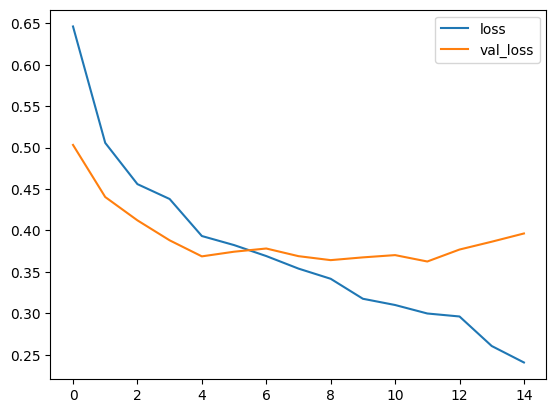

In [48]:
pd.DataFrame({"loss": history.history["loss"], "val_loss": history.history["val_loss"]}).plot()

In [50]:
wget.download("https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip")

'10_food_classes_all_data.zip'

In [52]:
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")

In [53]:
zip_ref.extractall()

In [59]:
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/test.
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream.
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen.
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings.
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice.
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza.
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi.
There are 10 directories and 0 ima

In [97]:
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [98]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [100]:
train_data_shuffled = train_datagen.flow_from_directory(train_dir, batch_size=32, target_size=(224, 224), class_mode="categorical", shuffle=True)

Found 7500 images belonging to 10 classes.


In [101]:
valid_data = valid_datagen.flow_from_directory(test_dir, batch_size=32, target_size=(224, 224), class_mode="categorical")

Found 2500 images belonging to 10 classes.


In [104]:
model9 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

model9.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [105]:
history = model9.fit(train_data_shuffled, epochs=10, validation_data=valid_data)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 86ms/step - accuracy: 0.1800 - loss: 2.2084 - val_accuracy: 0.3120 - val_loss: 1.9469
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.3345 - loss: 1.8890 - val_accuracy: 0.3560 - val_loss: 1.8699
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 0.3958 - loss: 1.7662 - val_accuracy: 0.3692 - val_loss: 1.8212
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.4898 - loss: 1.5269 - val_accuracy: 0.3584 - val_loss: 1.8560
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.5720 - loss: 1.2855 - val_accuracy: 0.3672 - val_loss: 1.8908
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.6478 - loss: 1.0872 - val_accuracy: 0.3616 - val_loss: 2.0725
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.7074 - loss: 0.8929 - val_accuracy: 0.3424 - val_loss: 2.2140
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - accuracy: 0.7634 - loss: 0.7304 - 

<Axes: >

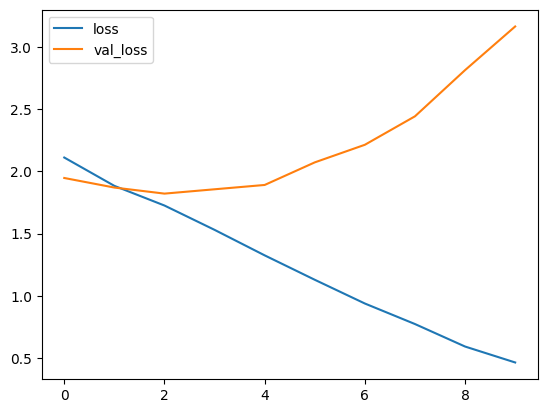

In [106]:
pd.DataFrame({"loss": history.history["loss"], "val_loss": history.history["val_loss"]}).plot()

In [108]:
train_data_shuffled[0][1]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 

 ImageDataGenerator автоматично конвертує мітки класів у one-hot encoding формат

In [109]:
model9.evaluate(valid_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.3192 - loss: 3.1201


[3.1656007766723633, 0.3192000091075897]

In [110]:
model10 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

model10.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [111]:
model10.fit(train_data_shuffled, epochs=10, validation_data=valid_data)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.1587 - loss: 2.3009 - val_accuracy: 0.2984 - val_loss: 1.9990
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.3500 - loss: 1.8921 - val_accuracy: 0.2820 - val_loss: 1.9909
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.4454 - loss: 1.6653 - val_accuracy: 0.3128 - val_loss: 1.9694
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.6045 - loss: 1.2385 - val_accuracy: 0.2936 - val_loss: 2.1518
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.7740 - loss: 0.7580 - val_accuracy: 0.2740 - val_loss: 2.7620
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.8912 - loss: 0.4139 - val_accuracy: 0.2884 - val_loss: 2.9916
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.9603 - loss: 0.1895 - val_accuracy: 0.2740 - val_loss: 3.6350
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.9880 - loss: 0.0877 - 

In [112]:
train_datagen_augmented = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=0.2, zoom_range = 0.2, width_shift_range=0.2, height_shift_range=0.2)

In [113]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir, batch_size=32, target_size=(224, 224), class_mode="categorical", shuffle=True)

Found 7500 images belonging to 10 classes.


In [114]:
model11 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

model11.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [115]:
history = model11.fit(train_data_augmented_shuffled, epochs=5, validation_data=valid_data)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 85s 349ms/step - accuracy: 0.1328 - loss: 2.2638 - val_accuracy: 0.2152 - val_loss: 2.1102
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 59s 249ms/step - accuracy: 0.2286 - loss: 2.1196 - val_accuracy: 0.3292 - val_loss: 1.9443
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 58s 245ms/step - accuracy: 0.2725 - loss: 2.0486 - val_accuracy: 0.3300 - val_loss: 1.9120
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 57s 241ms/step - accuracy: 0.3091 - loss: 1.9703 - val_accuracy: 0.3396 - val_loss: 1.8768
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 58s 246ms/step - accuracy: 0.3317 - loss: 1.9291 - val_accuracy: 0.3988 - val_loss: 1.7817


<Axes: >

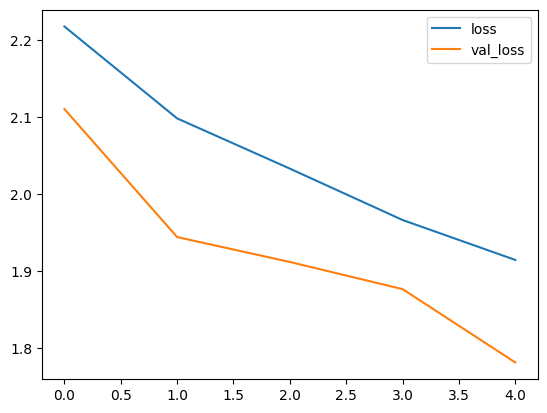

In [117]:
pd.DataFrame({"loss": history.history["loss"], "val_loss": history.history["val_loss"]}).plot()

In [118]:
model11.evaluate(valid_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.4055 - loss: 1.7908


[1.7817484140396118, 0.39879998564720154]

In [120]:
model11.save("model11.keras")

In [121]:
loaded_model11 = tf.keras.models.load_model("model11.keras")

In [122]:
loaded_model11.evaluate(valid_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.4047 - loss: 1.7603


[1.7817484140396118, 0.39879998564720154]